#Importing Libraries 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score,classification_report,confusion_matrix,accuracy_score,f1_score,roc_auc_score


import warnings
warnings.filterwarnings('ignore')







Loan Delinquency Prediction
Loan default prediction is one of the most critical and crucial problem faced by financial institutions and organizations as it has a noteworthy effect on the profitability of these institutions. In recent years, there is a tremendous increase in the volume of non – performing loans which results in a jeopardizing effect on the growth of these institutions.
Therefore, to maintain a healthy portfolio, the banks put stringent monitoring and evaluation measures in place to ensure timely repayment of loans by borrowers. Despite these measures, a major proportion of loans become delinquent. Delinquency occurs when a borrower misses a payment against his/her loan.
Given the information like mortgage details, borrowers related details and payment details, our objective is to identify the delinquency status of loans for the next month given the delinquency status for the previous 12 months (in number of months)

#EDA

Before going to any kind of modelling, we will always want to have a look at the kind of data that we have.

We have been provided three files. A description for what each of these files contain is given below:

sample_submission.csv: This gives us a required format for submitting our solutions to the greay atom solution checker.

train.csv: We will use this file for training our model. It contains variables or features that we will input to our model, and the target variable that we want to predict.

test.csv: This will contain all variables in the training dataset except the target variable. We will use our trained model to predict the target for this dataset.

Now lets go on to read and have a look at each of the files.


In [2]:
ss=pd.read_csv('sample_submission.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
ss.head(20)

,Unnamed: 0,m13
0,68426,1
1,49544,0
2,96751,0
3,112058,0
4,85610,0
5,51718,0
6,50918,0
7,32492,0
8,62850,0
9,12433,0



Our sample submission file contains two columns: 'Unnamed: 0' and 'm13'. We don't need the ss for now, we will get back to it once we have completed our modelling and predicting phase.

Lets go and explore our training and test datasets. We will do the following steps:

Brief Look at the Dataset

See the dataset shape.

Target Distribution.

See the variables datatypes.

See the number of missing/null values.

See the number of unique values in each variable.



#1. Brief look at the dataset.

In [4]:
train.head(3)



,Unnamed: 0,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,81041,861482495205,Y,"Martinez, Duffy and Bird",3.375,272000,180,2012-01-01,03/2012,72,2.0,31.0,770.0,B12,0.0,786.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,51021,173139140902,Y,"Swanson, Newton and Miller",4.250,371000,360,2012-01-01,03/2012,95,1.0,45.0,727.0,C86,30.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,83866,481942560913,Y,OTHER,4.500,90000,360,2012-01-01,03/2012,69,1.0,39.0,726.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
test.head(3)

,Unnamed: 0,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,68426,780423564300,X,OTHER,3.375,144000,180,2012-01-01,03/2012,73,2.0,20.0,790.0,A23,0.0,797.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
1,49544,472138003270,Y,Browning-Hart,4.375,110000,360,2012-01-01,03/2012,88,1.0,45.0,779.0,C86,25.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
2,96751,233667097068,X,Browning-Hart,4.125,243000,240,2012-02-01,04/2012,70,2.0,40.0,727.0,B12,0.0,705.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0


#2. Dataset Shape

In [6]:
print(f'\nTrain contains {train.shape[0]} samples and {train.shape[1]} variables')
print(f'\nTest contains {test.shape[0]} samples and {test.shape[1]} variables')


Train contains 92846 samples and 30 variables

Test contains 23212 samples and 29 variables


#3. Target Distribution

In [7]:
train['m13'].value_counts(normalize=True)

0    0.994561
1    0.005439
Name: m13, dtype: float64


Visually we are able to see communicate things more clearly and graphs help us do that. Lets visualize the same target distribution in a countplot.

Text(0.5, 1.0, 'loan deliquency status (0 = non deliquent, 1 = deliquent)')

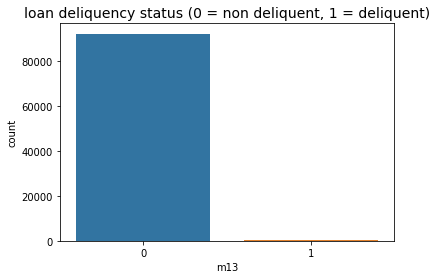

In [8]:
sns.countplot(train['m13'])
plt.title("loan deliquency status (0 = non deliquent, 1 = deliquent)", fontsize=14)

In [9]:


non_deliquency_percentage = train['m13'].value_counts()[0]/(train['m13'].value_counts()[0]+train['m13'].value_counts()[1])
print("Non deliquency percentage",non_deliquency_percentage*100)



Non deliquency percentage 99.45608857678306


In [10]:


deliquency_percentage = train['m13'].value_counts()[1]/(train['m13'].value_counts()[0]+train['m13'].value_counts()[1])
print("Deliquency percentage",deliquency_percentage*100)



Deliquency percentage 0.5439114232169399


#4. Variable Datatypes

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92846 entries, 0 to 92845
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                92846 non-null  int64  
 1   loan_id                   92846 non-null  int64  
 2   source                    92846 non-null  object 
 3   financial_institution     92846 non-null  object 
 4   interest_rate             92846 non-null  float64
 5   unpaid_principal_bal      92846 non-null  int64  
 6   loan_term                 92846 non-null  int64  
 7   origination_date          92846 non-null  object 
 8   first_payment_date        92846 non-null  object 
 9   loan_to_value             92846 non-null  int64  
 10  number_of_borrowers       92846 non-null  float64
 11  debt_to_income_ratio      92846 non-null  float64
 12  borrower_credit_score     92846 non-null  float64
 13  loan_purpose              92846 non-null  object 
 14  insura

Looks like we have a mixture of datatypes, a lot of these variables are object datatypes. Object datatypes are used to store strings along with other non-numeric data. .

Machine Learning Models understand only numbers so we will have to later convert these strings to numbers


#5. Null Values

Although the info() function did tell us about non-null values ideally we want to have a look at the percentage of null values in each variable.

In [12]:
null_values_per_variable = 100 * (train.isnull().sum()/train.shape[0]).round(3)#.reset_index()
null_values_per_variable.sort_values(ascending=False)

m13                         0.0
m12                         0.0
loan_id                     0.0
source                      0.0
financial_institution       0.0
interest_rate               0.0
unpaid_principal_bal        0.0
loan_term                   0.0
origination_date            0.0
first_payment_date          0.0
loan_to_value               0.0
number_of_borrowers         0.0
debt_to_income_ratio        0.0
borrower_credit_score       0.0
loan_purpose                0.0
insurance_percent           0.0
co-borrower_credit_score    0.0
insurance_type              0.0
m1                          0.0
m2                          0.0
m3                          0.0
m4                          0.0
m5                          0.0
m6                          0.0
m7                          0.0
m8                          0.0
m9                          0.0
m10                         0.0
m11                         0.0
Unnamed: 0                  0.0
dtype: float64

In [13]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [14]:
missing_values_table(train)

Your selected dataframe has 30 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


#6. Unique values in each variable

In [15]:
train.nunique()

Unnamed: 0                  92846
loan_id                     92846
source                          3
financial_institution          19
interest_rate                 813
unpaid_principal_bal          637
loan_term                     127
origination_date                3
first_payment_date              4
loan_to_value                  92
number_of_borrowers             2
debt_to_income_ratio           57
borrower_credit_score         219
loan_purpose                    3
insurance_percent              13
co-borrower_credit_score      216
insurance_type                  2
m1                              4
m2                              4
m3                              5
m4                              5
m5                              7
m6                              7
m7                              8
m8                              9
m9                             10
m10                            11
m11                            12
m12                            12
m13           

In [16]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = train[train.duplicated()]
print("Total Duplicate Rows except first occurrence based on all columns are :")
duplicateRowsDF.shape


Total Duplicate Rows except first occurrence based on all columns are :


(0, 30)

In [17]:
train.head(2)

,Unnamed: 0,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,81041,861482495205,Y,"Martinez, Duffy and Bird",3.375,272000,180,2012-01-01,03/2012,72,2.0,31.0,770.0,B12,0.0,786.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,51021,173139140902,Y,"Swanson, Newton and Miller",4.250,371000,360,2012-01-01,03/2012,95,1.0,45.0,727.0,C86,30.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0


Handling date featuers

In [18]:
train['origination_date'] = pd.to_datetime(train['origination_date'])


In [19]:
train.head(2)

,Unnamed: 0,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,81041,861482495205,Y,"Martinez, Duffy and Bird",3.375,272000,180,2012-01-01,03/2012,72,2.0,31.0,770.0,B12,0.0,786.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,51021,173139140902,Y,"Swanson, Newton and Miller",4.250,371000,360,2012-01-01,03/2012,95,1.0,45.0,727.0,C86,30.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
train['origination_year'] = train['origination_date'].apply(lambda x : x.year)

train['origination_month'] = train['origination_date'].apply(lambda x : x.month)

train = train.drop(['origination_date'],axis=1)

In [21]:
train.head(2)

,Unnamed: 0,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,origination_year,origination_month
0,81041,861482495205,Y,"Martinez, Duffy and Bird",3.375,272000,180,03/2012,72,2.0,31.0,770.0,B12,0.0,786.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,2012,1
1,51021,173139140902,Y,"Swanson, Newton and Miller",4.250,371000,360,03/2012,95,1.0,45.0,727.0,C86,30.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,2012,1


In [22]:
test.head(2)

,Unnamed: 0,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,68426,780423564300,X,OTHER,3.375,144000,180,2012-01-01,03/2012,73,2.0,20.0,790.0,A23,0.0,797.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
1,49544,472138003270,Y,Browning-Hart,4.375,110000,360,2012-01-01,03/2012,88,1.0,45.0,779.0,C86,25.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:


test['origination_date'] = pd.to_datetime(test['origination_date'])
test['origination_year'] = test['origination_date'].apply(lambda x : x.year)
test['origination_month'] = test['origination_date'].apply(lambda x : x.month)
test = test.drop(['origination_date'],axis=1)



In [24]:
test.head(2)

,Unnamed: 0,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,origination_year,origination_month
0,68426,780423564300,X,OTHER,3.375,144000,180,03/2012,73,2.0,20.0,790.0,A23,0.0,797.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,2012,1
1,49544,472138003270,Y,Browning-Hart,4.375,110000,360,03/2012,88,1.0,45.0,779.0,C86,25.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,2012,1


In [25]:
train['first_payment_year'] = train['first_payment_date'].apply(lambda x : x.split("/")[1])

train['first_payment_month'] = train['first_payment_date'].apply(lambda x : x.split("/")[0])

train = train.drop(['first_payment_date'],axis=1)

In [26]:
train.head(2)

,Unnamed: 0,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,origination_year,origination_month,first_payment_year,first_payment_month
0,81041,861482495205,Y,"Martinez, Duffy and Bird",3.375,272000,180,72,2.0,31.0,770.0,B12,0.0,786.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,2012,1,2012,03
1,51021,173139140902,Y,"Swanson, Newton and Miller",4.250,371000,360,95,1.0,45.0,727.0,C86,30.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,2012,1,2012,03


In [27]:


test['first_payment_year'] = test['first_payment_date'].apply(lambda x : x.split("/")[1])
test['first_payment_month'] = test['first_payment_date'].apply(lambda x : x.split("/")[0])
test= test.drop(['first_payment_date'],axis=1)



In [28]:
test.head(2)

,Unnamed: 0,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,origination_year,origination_month,first_payment_year,first_payment_month
0,68426,780423564300,X,OTHER,3.375,144000,180,73,2.0,20.0,790.0,A23,0.0,797.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,2012,1,2012,03
1,49544,472138003270,Y,Browning-Hart,4.375,110000,360,88,1.0,45.0,779.0,C86,25.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,2012,1,2012,03


In [29]:
train.head(2)

,Unnamed: 0,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,origination_year,origination_month,first_payment_year,first_payment_month
0,81041,861482495205,Y,"Martinez, Duffy and Bird",3.375,272000,180,72,2.0,31.0,770.0,B12,0.0,786.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,2012,1,2012,03
1,51021,173139140902,Y,"Swanson, Newton and Miller",4.250,371000,360,95,1.0,45.0,727.0,C86,30.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,2012,1,2012,03


In [30]:
train['Average_credit_score'] = (train['borrower_credit_score']+train['co-borrower_credit_score'])/train['number_of_borrowers']
train.drop(columns='number_of_borrowers',inplace=True)
train.drop(columns='borrower_credit_score',inplace=True)
train.drop(columns='co-borrower_credit_score',inplace=True)
train.head(2)

,Unnamed: 0,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,debt_to_income_ratio,loan_purpose,insurance_percent,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,origination_year,origination_month,first_payment_year,first_payment_month,Average_credit_score
0,81041,861482495205,Y,"Martinez, Duffy and Bird",3.375,272000,180,72,31.0,B12,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,2012,1,2012,03,778.0
1,51021,173139140902,Y,"Swanson, Newton and Miller",4.250,371000,360,95,45.0,C86,30.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,2012,1,2012,03,727.0


In [31]:
test['Average_credit_score'] = (test['borrower_credit_score']+test['co-borrower_credit_score'])/test['number_of_borrowers']
test.drop(columns='number_of_borrowers',inplace=True)
test.drop(columns='borrower_credit_score',inplace=True)
test.drop(columns='co-borrower_credit_score',inplace=True)
test.head(2)

,Unnamed: 0,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,debt_to_income_ratio,loan_purpose,insurance_percent,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,origination_year,origination_month,first_payment_year,first_payment_month,Average_credit_score
0,68426,780423564300,X,OTHER,3.375,144000,180,73,20.0,A23,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,2012,1,2012,03,793.5
1,49544,472138003270,Y,Browning-Hart,4.375,110000,360,88,45.0,C86,25.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,2012,1,2012,03,779.0


Calculation Monthly Installments

In [32]:
train['loan_term_years'] = train['loan_term']/12
train.drop(columns='loan_term',inplace=True)
train.head()

,Unnamed: 0,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_to_value,debt_to_income_ratio,loan_purpose,insurance_percent,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,origination_year,origination_month,first_payment_year,first_payment_month,Average_credit_score,loan_term_years
0,81041,861482495205,Y,"Martinez, Duffy and Bird",3.375,272000,72,31.0,B12,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,2012,1,2012,03,778.0,15.0
1,51021,173139140902,Y,"Swanson, Newton and Miller",4.250,371000,95,45.0,C86,30.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,2012,1,2012,03,727.0,30.0
2,83866,481942560913,Y,OTHER,4.500,90000,69,39.0,B12,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,2012,1,2012,03,726.0,30.0
3,92311,676780245612,Y,"Turner, Baldwin and Rhodes",4.500,47000,75,43.0,B12,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,2012,2,2012,04,688.0,20.0
4,72274,433043514697,X,OTHER,4.875,177000,80,13.0,C86,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,2012,1,2012,03,673.5,30.0


In [33]:
test['loan_term_years'] = test['loan_term']/12
test.drop(columns='loan_term',inplace=True)
test.head()

,Unnamed: 0,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_to_value,debt_to_income_ratio,loan_purpose,insurance_percent,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,origination_year,origination_month,first_payment_year,first_payment_month,Average_credit_score,loan_term_years
0,68426,780423564300,X,OTHER,3.375,144000,73,20.0,A23,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,2012,1,2012,03,793.5,15.0
1,49544,472138003270,Y,Browning-Hart,4.375,110000,88,45.0,C86,25.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,2012,1,2012,03,779.0,30.0
2,96751,233667097068,X,Browning-Hart,4.125,243000,70,40.0,B12,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,2012,2,2012,04,716.0,20.0
3,112058,117580972208,X,OTHER,2.875,189000,64,35.0,A23,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,2012,3,2012,05,795.5,10.0
4,85610,440010429529,Z,OTHER,4.000,141000,84,31.0,A23,12.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,2012,3,2012,05,809.0,30.0


In [34]:
train['monthly_installment'] = ((train.unpaid_principal_bal)*(1+(train.interest_rate)/100))/((train.loan_term_years)*12)
train.head()

,Unnamed: 0,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_to_value,debt_to_income_ratio,loan_purpose,insurance_percent,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,origination_year,origination_month,first_payment_year,first_payment_month,Average_credit_score,loan_term_years,monthly_installment
0,81041,861482495205,Y,"Martinez, Duffy and Bird",3.375,272000,72,31.0,B12,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,2012,1,2012,03,778.0,15.0,1562.111111
1,51021,173139140902,Y,"Swanson, Newton and Miller",4.250,371000,95,45.0,C86,30.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,2012,1,2012,03,727.0,30.0,1074.354167
2,83866,481942560913,Y,OTHER,4.500,90000,69,39.0,B12,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,2012,1,2012,03,726.0,30.0,261.250000
3,92311,676780245612,Y,"Turner, Baldwin and Rhodes",4.500,47000,75,43.0,B12,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,2012,2,2012,04,688.0,20.0,204.645833
4,72274,433043514697,X,OTHER,4.875,177000,80,13.0,C86,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,2012,1,2012,03,673.5,30.0,515.635417


In [35]:
test['monthly_installment'] = ((test.unpaid_principal_bal)*(1+(test.interest_rate)/100))/((test.loan_term_years)*12)
test.head()

,Unnamed: 0,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_to_value,debt_to_income_ratio,loan_purpose,insurance_percent,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,origination_year,origination_month,first_payment_year,first_payment_month,Average_credit_score,loan_term_years,monthly_installment
0,68426,780423564300,X,OTHER,3.375,144000,73,20.0,A23,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,2012,1,2012,03,793.5,15.0,827.000000
1,49544,472138003270,Y,Browning-Hart,4.375,110000,88,45.0,C86,25.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,2012,1,2012,03,779.0,30.0,318.923611
2,96751,233667097068,X,Browning-Hart,4.125,243000,70,40.0,B12,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,2012,2,2012,04,716.0,20.0,1054.265625
3,112058,117580972208,X,OTHER,2.875,189000,64,35.0,A23,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,2012,3,2012,05,795.5,10.0,1620.281250
4,85610,440010429529,Z,OTHER,4.000,141000,84,31.0,A23,12.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,2012,3,2012,05,809.0,30.0,407.333333


In [36]:
train.columns

Index(['Unnamed: 0', 'loan_id', 'source', 'financial_institution',
       'interest_rate', 'unpaid_principal_bal', 'loan_to_value',
       'debt_to_income_ratio', 'loan_purpose', 'insurance_percent',
       'insurance_type', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9',
       'm10', 'm11', 'm12', 'm13', 'origination_year', 'origination_month',
       'first_payment_year', 'first_payment_month', 'Average_credit_score',
       'loan_term_years', 'monthly_installment'],
      dtype='object')

In [37]:
train.drop(['origination_year', 'origination_month','first_payment_year', 'first_payment_month'],axis=1,inplace=True)

In [38]:
train.head(2)

,Unnamed: 0,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_to_value,debt_to_income_ratio,loan_purpose,insurance_percent,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,Average_credit_score,loan_term_years,monthly_installment
0,81041,861482495205,Y,"Martinez, Duffy and Bird",3.375,272000,72,31.0,B12,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,778.0,15.0,1562.111111
1,51021,173139140902,Y,"Swanson, Newton and Miller",4.250,371000,95,45.0,C86,30.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,727.0,30.0,1074.354167


In [39]:
test.drop(['origination_year', 'origination_month','first_payment_year', 'first_payment_month'],axis=1,inplace=True)

In [40]:
test.head(2)

,Unnamed: 0,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_to_value,debt_to_income_ratio,loan_purpose,insurance_percent,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,Average_credit_score,loan_term_years,monthly_installment
0,68426,780423564300,X,OTHER,3.375,144000,73,20.0,A23,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,793.5,15.0,827.000000
1,49544,472138003270,Y,Browning-Hart,4.375,110000,88,45.0,C86,25.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,779.0,30.0,318.923611


#Analyzing Each Variable & their relationships

There are two types of features that we have:

    Categorical
    Numerical

Also our target is Binary

For each feature type we will be perform two types of analysis:

    Univariate: Analyze 1 feature at a time

    Bivariate: Analyze the relationship of that feature with target variable, i.e. 'm13'




In [41]:
train.columns

Index(['Unnamed: 0', 'loan_id', 'source', 'financial_institution',
       'interest_rate', 'unpaid_principal_bal', 'loan_to_value',
       'debt_to_income_ratio', 'loan_purpose', 'insurance_percent',
       'insurance_type', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9',
       'm10', 'm11', 'm12', 'm13', 'Average_credit_score', 'loan_term_years',
       'monthly_installment'],
      dtype='object')

#Segregating Categorical & Numerical Variables

In [42]:
dataframe_con = train.select_dtypes(include=np.number)
dataframe_cat = train.select_dtypes(exclude=np.number)

In [43]:
dataframe_cat.head()

,source,financial_institution,loan_purpose
0,Y,"Martinez, Duffy and Bird",B12
1,Y,"Swanson, Newton and Miller",C86
2,Y,OTHER,B12
3,Y,"Turner, Baldwin and Rhodes",B12
4,X,OTHER,C86


In [44]:
dataframe_cat.columns

Index(['source', 'financial_institution', 'loan_purpose'], dtype='object')

In [45]:
dataframe_con.head()

,Unnamed: 0,loan_id,interest_rate,unpaid_principal_bal,loan_to_value,debt_to_income_ratio,insurance_percent,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,Average_credit_score,loan_term_years,monthly_installment
0,81041,861482495205,3.375,272000,72,31.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,778.0,15.0,1562.111111
1,51021,173139140902,4.250,371000,95,45.0,30.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,727.0,30.0,1074.354167
2,83866,481942560913,4.500,90000,69,39.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,726.0,30.0,261.250000
3,92311,676780245612,4.500,47000,75,43.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,688.0,20.0,204.645833
4,72274,433043514697,4.875,177000,80,13.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,673.5,30.0,515.635417


In [46]:
dataframe_con.columns

Index(['Unnamed: 0', 'loan_id', 'interest_rate', 'unpaid_principal_bal',
       'loan_to_value', 'debt_to_income_ratio', 'insurance_percent',
       'insurance_type', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9',
       'm10', 'm11', 'm12', 'm13', 'Average_credit_score', 'loan_term_years',
       'monthly_installment'],
      dtype='object')

#Univariate Analysis - Bar Charts.

Pie Charts can be useful in seeing the proportion of samples, that fall into each category of a categorical variable. For each of the categorical variables we will make a bar charts.

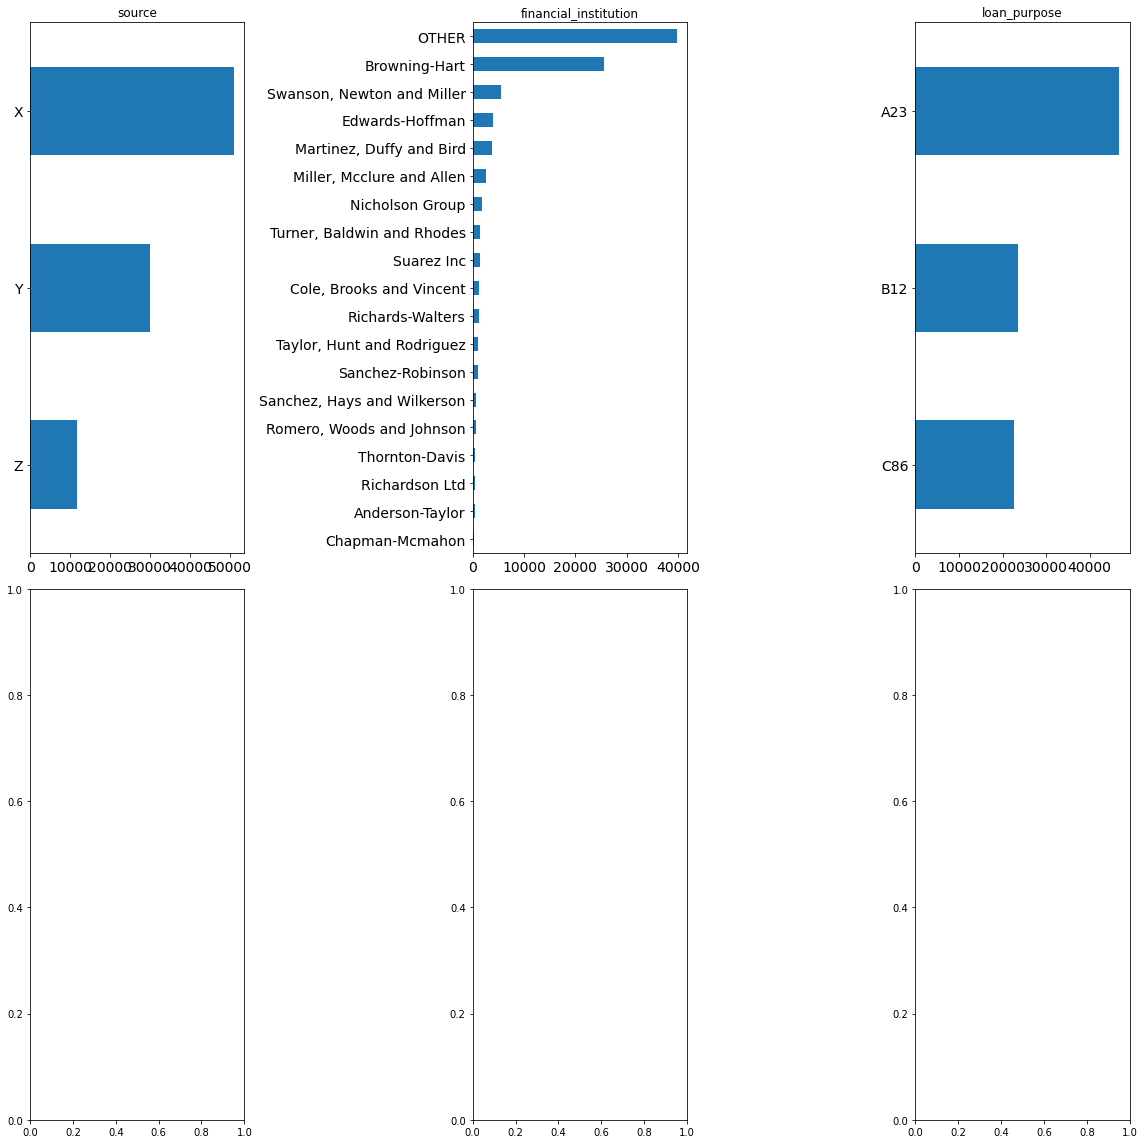

In [47]:
fig, axes = plt.subplots(2,3,figsize=(16, 16))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(dataframe_cat.columns):
    _ = dataframe_cat[c].value_counts()[::-1].plot(kind = 'barh', ax=axes[i], title=c, fontsize=14)
    
_ = plt.tight_layout()

#Bivariate Analysis Relationships with Target

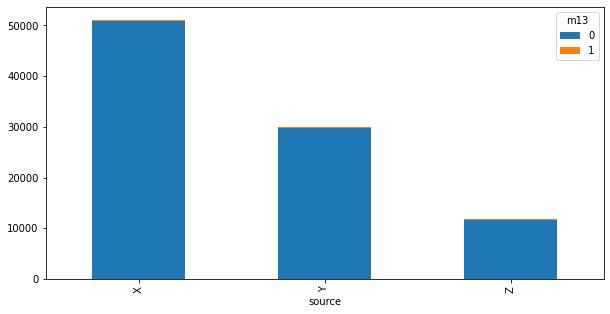

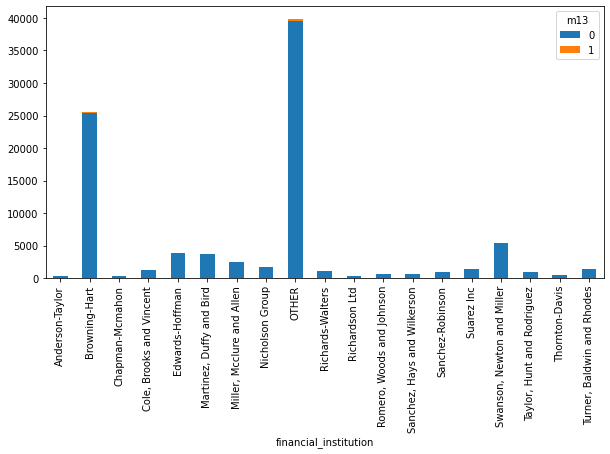

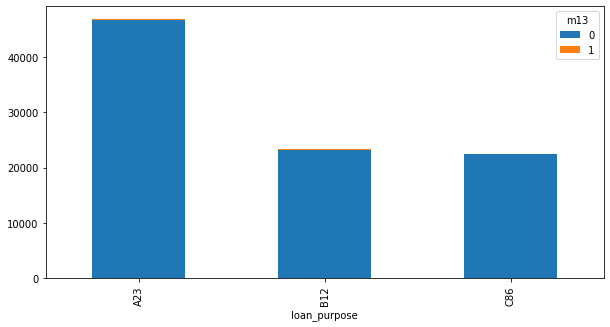

In [48]:
for i in dataframe_cat:
    train.groupby(i)['m13'].value_counts().unstack().plot(kind='bar',stacked=True,figsize=(10,5))

#**Numerical Features**

#1. Univariate Analysis - Boxplots

In [49]:
dataframe_con.columns

Index(['Unnamed: 0', 'loan_id', 'interest_rate', 'unpaid_principal_bal',
       'loan_to_value', 'debt_to_income_ratio', 'insurance_percent',
       'insurance_type', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9',
       'm10', 'm11', 'm12', 'm13', 'Average_credit_score', 'loan_term_years',
       'monthly_installment'],
      dtype='object')

In [50]:
num=['interest_rate', 'unpaid_principal_bal', 'loan_term_years', 'loan_to_value', 'debt_to_income_ratio', 'Average_credit_score', 'insurance_percent', 'insurance_type','monthly_installment']

In [51]:
numerical=dataframe_con[num]

In [52]:
numerical

,interest_rate,unpaid_principal_bal,loan_term_years,loan_to_value,debt_to_income_ratio,Average_credit_score,insurance_percent,insurance_type,monthly_installment
0,3.375,272000,15.0,72,31.0,778.0,0.0,0.0,1562.111111
1,4.250,371000,30.0,95,45.0,727.0,30.0,0.0,1074.354167
2,4.500,90000,30.0,69,39.0,726.0,0.0,0.0,261.250000
3,4.500,47000,20.0,75,43.0,688.0,0.0,0.0,204.645833
4,4.875,177000,30.0,80,13.0,673.5,0.0,0.0,515.635417
...,...,...,...,...,...,...,...,...,...
92841,3.875,68000,15.0,57,40.0,672.0,0.0,0.0,392.416667
92842,3.000,67000,15.0,35,12.0,750.5,0.0,0.0,383.388889
92843,4.500,81000,30.0,75,20.0,728.5,0.0,0.0,235.125000
92844,3.875,115000,15.0,72,44.0,785.0,0.0,0.0,663.645833


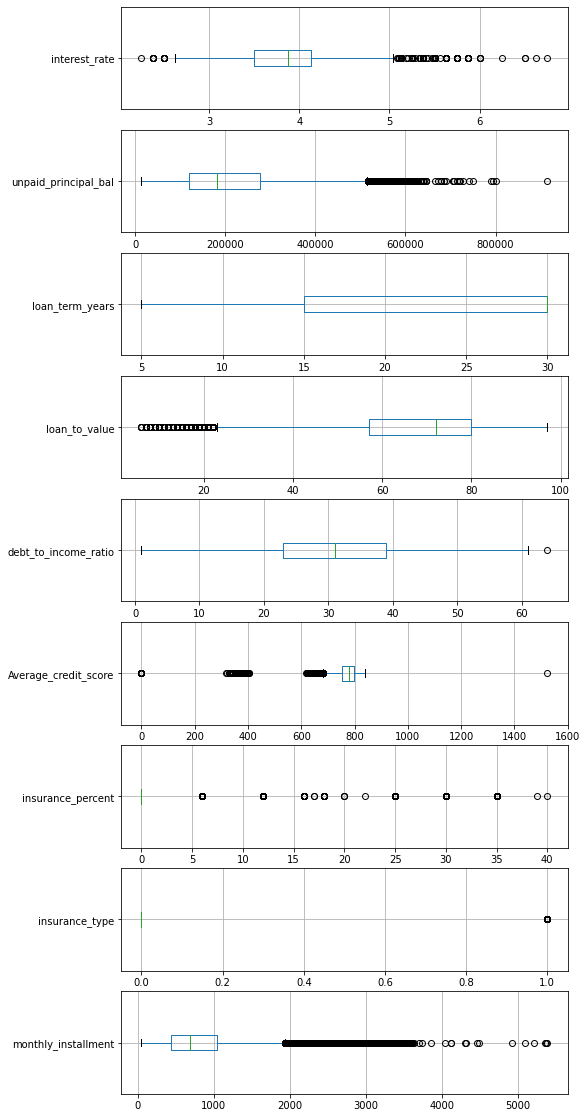

In [53]:
fig, axes = plt.subplots(9, 1, figsize=(8, 20))
for i, c in enumerate(numerical.columns):
  _ = train[[c]].boxplot(ax=axes[i], vert=False)

#2. Bivariate Analysis KDE plots - Relationships with Target Variable.

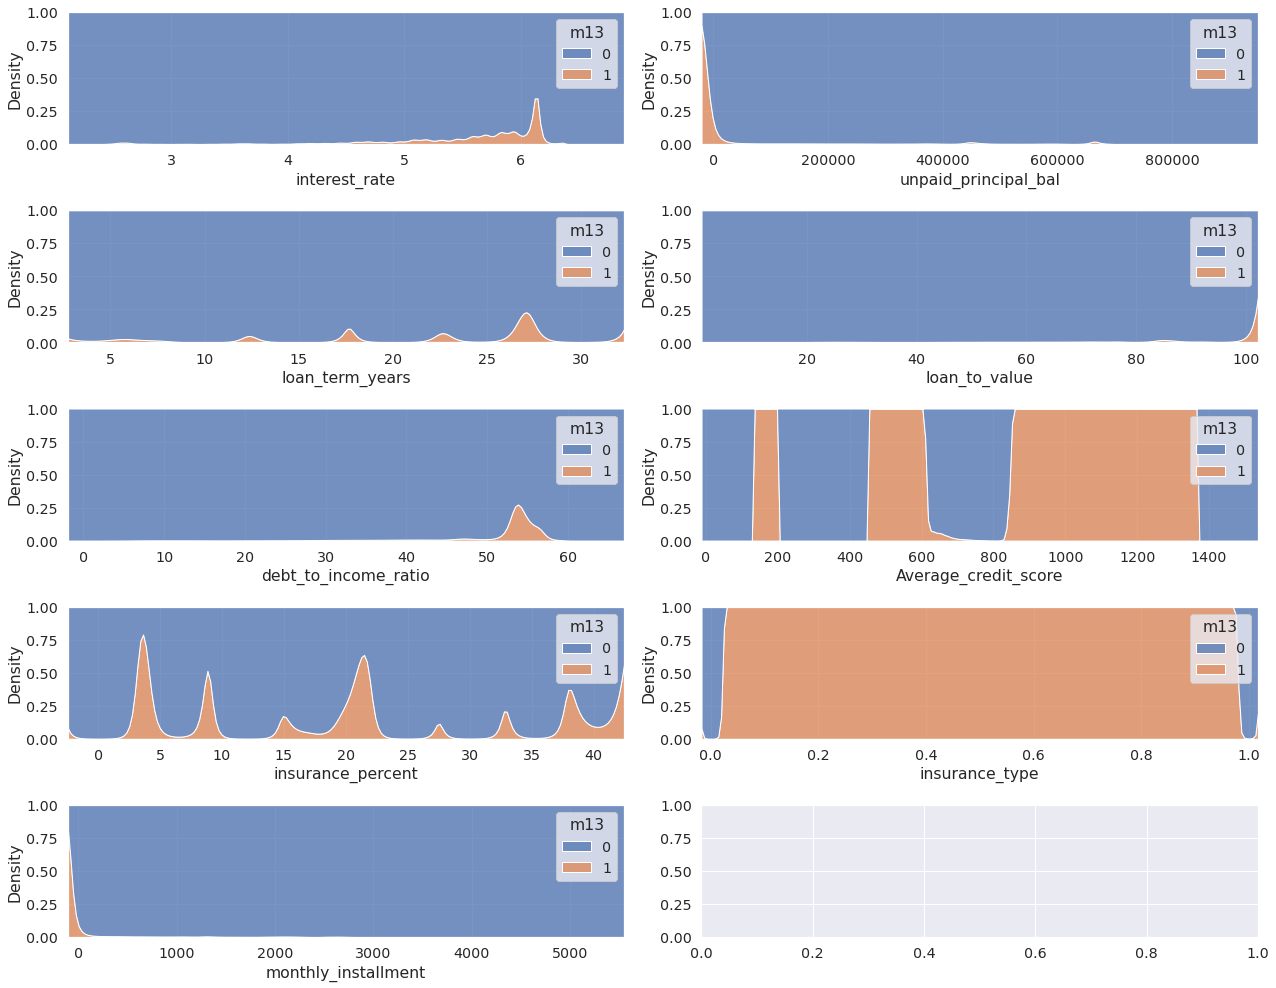

In [54]:
sns.set(font_scale=1.3)
fig, axes = plt.subplots(5, 2, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(numerical.columns):
  plot = sns.kdeplot(data=train, x=c, hue='m13', multiple='fill', ax=axes[i])
  plt.tight_layout()



#Heatmap 

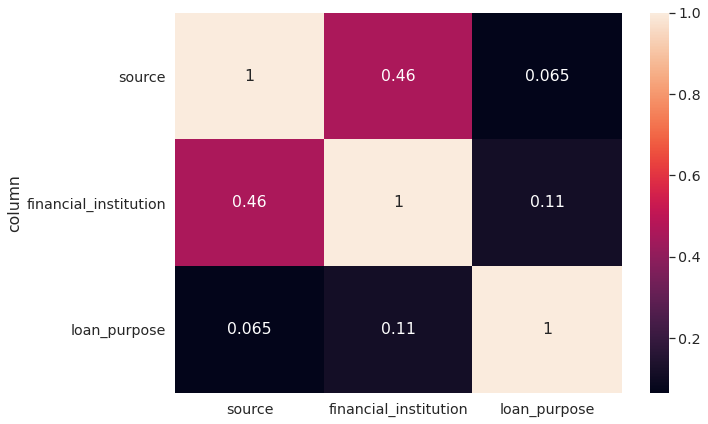

In [55]:
from scipy.stats import chi2_contingency
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))



categorical=['source', 'financial_institution','loan_purpose']
cramers=pd.DataFrame({i:[cramers_v(train[i],train[j]) for j in categorical] for i in categorical})
cramers['column']=[i for i in categorical if i not in ['memberid']]
cramers.set_index('column',inplace=True)

#categorical correlation heatmap

plt.figure(figsize=(10,7))
sns.heatmap(cramers,annot=True)
plt.show()

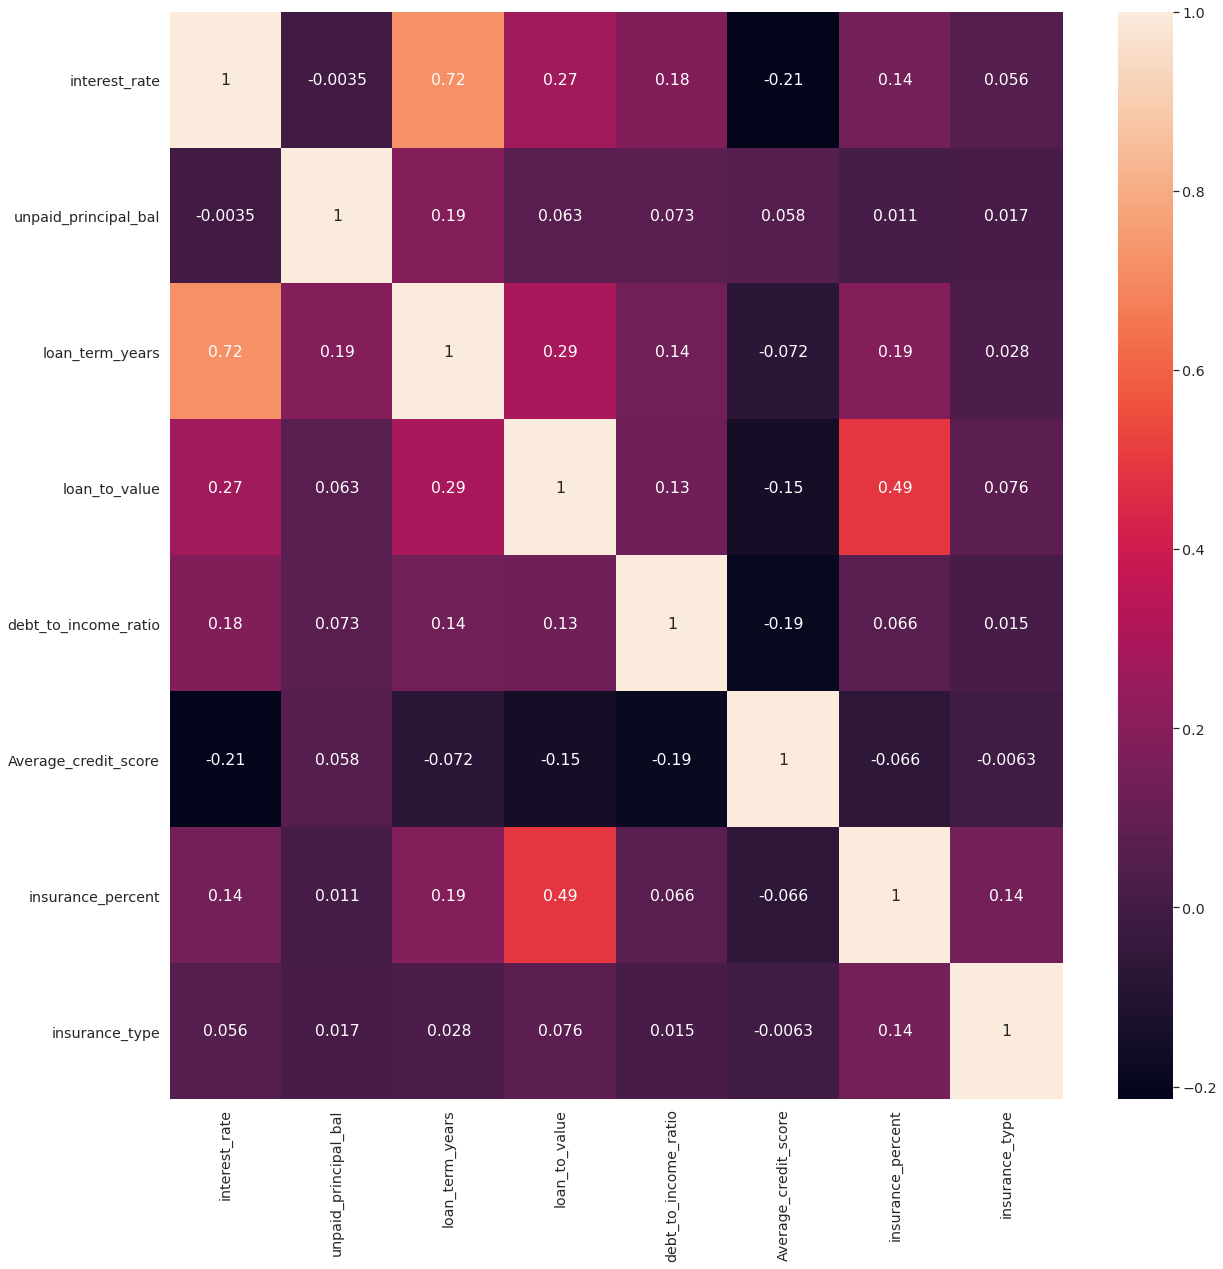

In [56]:
corr=numerical.iloc[:,:-1].corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(dataframe_con[top_features].corr(),annot=True)

#Using get dummies to convert categorical variable into dummy/indicator variables.

In [57]:
train.head(2)

,Unnamed: 0,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_to_value,debt_to_income_ratio,loan_purpose,insurance_percent,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,Average_credit_score,loan_term_years,monthly_installment
0,81041,861482495205,Y,"Martinez, Duffy and Bird",3.375,272000,72,31.0,B12,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,778.0,15.0,1562.111111
1,51021,173139140902,Y,"Swanson, Newton and Miller",4.250,371000,95,45.0,C86,30.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,727.0,30.0,1074.354167


In [58]:
data1 = pd.get_dummies(train,columns=['source', 'financial_institution','loan_purpose'],drop_first=True)

In [59]:
data1.head(2)

,Unnamed: 0,loan_id,interest_rate,unpaid_principal_bal,loan_to_value,debt_to_income_ratio,insurance_percent,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,Average_credit_score,loan_term_years,monthly_installment,source_Y,source_Z,financial_institution_Browning-Hart,financial_institution_Chapman-Mcmahon,"financial_institution_Cole, Brooks and Vincent",financial_institution_Edwards-Hoffman,"financial_institution_Martinez, Duffy and Bird","financial_institution_Miller, Mcclure and Allen",financial_institution_Nicholson Group,financial_institution_OTHER,financial_institution_Richards-Walters,financial_institution_Richardson Ltd,"financial_institution_Romero, Woods and Johnson","financial_institution_Sanchez, Hays and Wilkerson",financial_institution_Sanchez-Robinson,financial_institution_Suarez Inc,"financial_institution_Swanson, Newton and Miller","financial_institution_Taylor, Hunt and Rodriguez",financial_institution_Thornton-Davis,"financial_institution_Turner, Baldwin and Rhodes",loan_purpose_B12,loan_purpose_C86
0,81041,861482495205,3.375,272000,72,31.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,778.0,15.0,1562.111111,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,51021,173139140902,4.250,371000,95,45.0,30.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,727.0,30.0,1074.354167,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [60]:
data1.drop(['Unnamed: 0','loan_id'],1,inplace=True)

In [61]:

data1.head(2)

,interest_rate,unpaid_principal_bal,loan_to_value,debt_to_income_ratio,insurance_percent,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,Average_credit_score,loan_term_years,monthly_installment,source_Y,source_Z,financial_institution_Browning-Hart,financial_institution_Chapman-Mcmahon,"financial_institution_Cole, Brooks and Vincent",financial_institution_Edwards-Hoffman,"financial_institution_Martinez, Duffy and Bird","financial_institution_Miller, Mcclure and Allen",financial_institution_Nicholson Group,financial_institution_OTHER,financial_institution_Richards-Walters,financial_institution_Richardson Ltd,"financial_institution_Romero, Woods and Johnson","financial_institution_Sanchez, Hays and Wilkerson",financial_institution_Sanchez-Robinson,financial_institution_Suarez Inc,"financial_institution_Swanson, Newton and Miller","financial_institution_Taylor, Hunt and Rodriguez",financial_institution_Thornton-Davis,"financial_institution_Turner, Baldwin and Rhodes",loan_purpose_B12,loan_purpose_C86
0,3.375,272000,72,31.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,778.0,15.0,1562.111111,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,4.250,371000,95,45.0,30.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,727.0,30.0,1074.354167,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


#Split the train set into train and validation sets.

In [62]:
X= data1.drop(['m13'],axis=1)
y = train['m13']

In [63]:
X.shape

(92846, 43)

In [64]:
X.dtypes

interest_rate                                        float64
unpaid_principal_bal                                   int64
loan_to_value                                          int64
debt_to_income_ratio                                 float64
insurance_percent                                    float64
insurance_type                                       float64
m1                                                     int64
m2                                                     int64
m3                                                     int64
m4                                                     int64
m5                                                     int64
m6                                                     int64
m7                                                     int64
m8                                                     int64
m9                                                     int64
m10                                                    int64
m11                     

In [65]:
for x in X.columns:
  X[x]=X[x].astype(int)
  df_types = X.dtypes.value_counts()
print(df_types)

int64    43
dtype: int64


[2.02720756e-02 9.26568704e-02 7.62812564e-02 8.57867240e-02
 1.24450505e-02 2.16816720e-03 5.97742420e-03 6.44880054e-03
 6.62459176e-03 1.19201681e-02 1.40044585e-02 1.60480363e-02
 2.27730082e-02 2.63976969e-02 4.49340886e-02 4.15108696e-02
 7.66696956e-02 1.35914430e-01 1.05475758e-01 1.67097828e-02
 9.13172458e-02 1.20087453e-02 8.52332472e-03 8.39563257e-03
 1.80780098e-05 2.00425589e-03 3.20473344e-03 4.09066208e-03
 2.87289727e-03 2.18419610e-03 1.02698929e-02 1.31874715e-03
 2.97372939e-04 9.97941150e-04 4.03749959e-04 3.93212751e-04
 8.62973172e-04 5.31790699e-03 1.07589052e-03 1.87387410e-04
 2.54081980e-03 1.12109419e-02 9.48444007e-03]


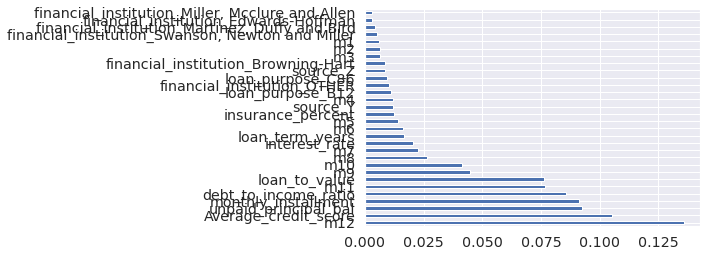

In [66]:
from sklearn.ensemble import ExtraTreesClassifier
model_features_importance=ExtraTreesClassifier()
model_features_importance.fit(X,y)
print(model_features_importance.feature_importances_)
ranked_features=pd.Series(model_features_importance.feature_importances_,index=X.columns)
ranked_features.nlargest(30).plot(kind='barh')

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =42)


#Fit a classification Model on train, check its results on validation set.

Decision Treee

In [68]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred= dt.predict(X_test)

print(f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.3578947368421052
[[27542   135]
 [  109    68]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27677
           1       0.33      0.38      0.36       177

    accuracy                           0.99     27854
   macro avg       0.67      0.69      0.68     27854
weighted avg       0.99      0.99      0.99     27854

0.33497536945812806
0.6896515473391702
0.384180790960452


Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred= rfc.predict(X_test)

print(f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.4979253112033195
[[27673     4]
 [  117    60]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27677
           1       0.94      0.34      0.50       177

    accuracy                           1.00     27854
   macro avg       0.97      0.67      0.75     27854
weighted avg       1.00      1.00      0.99     27854

0.9375
0.6694192632565864
0.3389830508474576


Hyperparameter Tuning

In [80]:
#hyperparameter RandomizedSearchCV
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)




{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [85]:
from sklearn.metrics import accuracy_score

In [86]:

import sklearn.metrics as metrics

In [ ]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)
rf_randomcv.best_params_
rf_randomcv
best_random_grid=rf_randomcv.best_estimator_
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27677
           1       0.73      0.52      0.61       177

    accuracy                           1.00     27854
   macro avg       0.86      0.76      0.80     27854
weighted avg       1.00      1.00      1.00     27854

[[27643    34]
 [   85    92]]
Accuracy of prediction: 0.996
F1 score of model is               0.9953701413778987


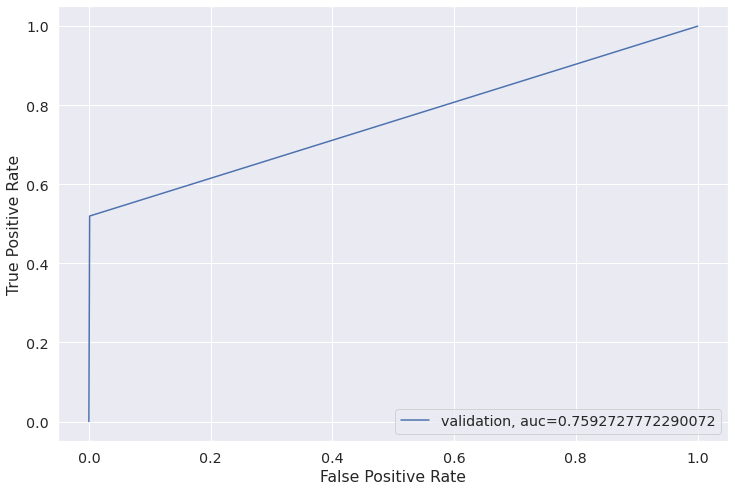

In [87]:
rfc1 = RandomForestClassifier(class_weight={0:1,1:5},
                       criterion='gini', max_depth=120,
                       min_samples_leaf=6, min_samples_split=5, n_estimators=1400)
rfc1.fit(X_train, y_train)
rfc1_pred = rfc1.predict(X_test)



print(classification_report(y_test,rfc1_pred))

cm=confusion_matrix(y_test,rfc1_pred)
print(cm)
print ("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))
print('F1 score of model is              ',f1_score(y_test,rfc1_pred,average='weighted'))

fpr, tpr, _ = metrics.roc_curve(y_test, rfc1_pred)
auc = metrics.roc_auc_score(y_test, rfc1_pred)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()


In [89]:
from xgboost import XGBClassifier

In [ ]:
param_grid = {'n_estimators': range(10, 50, 10),
                'max_depth': range(5, 25, 5),
             }

n_folds = 10

# Instantiate the grid search model
xgb = XGBClassifier()
random_cv = RandomizedSearchCV(estimator=xgb,
                               param_distributions=param_grid,
                               cv=n_folds, n_iter=25, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)

# Fit the grid search to the data
random_cv.fit(X_train,y_train)

#Evaluation Metric Submissions are evaluated on F1-Score between the predicted class and the observed target.

In [95]:
X_test_new = pd.get_dummies(test,columns=['source', 'financial_institution', 'loan_purpose'],drop_first=True)
X_test_new.head() 

,Unnamed: 0,loan_id,interest_rate,unpaid_principal_bal,loan_to_value,debt_to_income_ratio,insurance_percent,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,Average_credit_score,loan_term_years,monthly_installment,source_Y,source_Z,financial_institution_Browning-Hart,financial_institution_Chapman-Mcmahon,"financial_institution_Cole, Brooks and Vincent",financial_institution_Edwards-Hoffman,"financial_institution_Martinez, Duffy and Bird","financial_institution_Miller, Mcclure and Allen",financial_institution_Nicholson Group,financial_institution_OTHER,financial_institution_Richards-Walters,financial_institution_Richardson Ltd,"financial_institution_Romero, Woods and Johnson","financial_institution_Sanchez, Hays and Wilkerson",financial_institution_Sanchez-Robinson,financial_institution_Suarez Inc,"financial_institution_Swanson, Newton and Miller","financial_institution_Taylor, Hunt and Rodriguez",financial_institution_Thornton-Davis,"financial_institution_Turner, Baldwin and Rhodes",loan_purpose_B12,loan_purpose_C86
0,68426,780423564300,3.375,144000,73,20.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,793.5,15.0,827.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,49544,472138003270,4.375,110000,88,45.0,25.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,779.0,30.0,318.923611,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,96751,233667097068,4.125,243000,70,40.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,716.0,20.0,1054.265625,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,112058,117580972208,2.875,189000,64,35.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,795.5,10.0,1620.281250,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,85610,440010429529,4.000,141000,84,31.0,12.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,809.0,30.0,407.333333,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [96]:
X_train.shape

(64992, 43)

In [97]:
X_test_new.shape

(23212, 45)

In [98]:
X_test_new.drop(['Unnamed: 0','loan_id'],1,inplace=True)

In [99]:
X_test_new.shape

(23212, 43)

In [100]:
ran_test_pred = rfc1.predict(X_test_new)

In [101]:
ran_test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [102]:
final_predictions = pd.DataFrame(zip(test['Unnamed: 0'] ,ran_test_pred ), columns=['Unnamed: 0','m13'])

In [103]:
final_predictions.to_csv('Final_Predictions.csv',index=False)

In [104]:
final_predictions

,Unnamed: 0,m13
0,68426,0
1,49544,0
2,96751,0
3,112058,0
4,85610,0
...,...,...
23207,96588,0
23208,41278,0
23209,85093,0
23210,107245,0
